In [1]:
#following example at https://analyticsindiamag.com/how-to-implement-convolutional-autoencoder-in-pytorch-with-cuda/

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#loading data
# Converting data to torch.FloatTensor
transform = transforms.ToTensor()

# Download the training and test datasets
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)

test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
#Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=31, num_workers=0)
print(len(train_loader))
test_loader = torch.utils.data.DataLoader(test_data, batch_size=31, num_workers=0)

1613


images shape =  (31, 3, 32, 32)


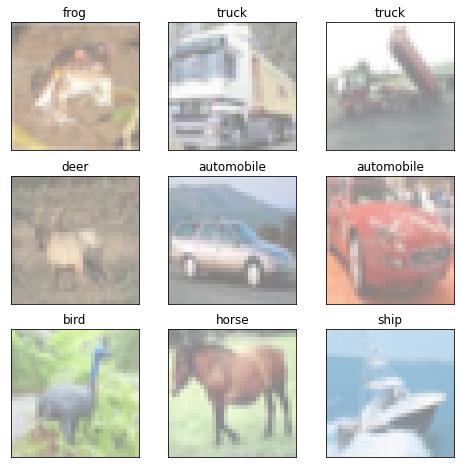

In [4]:
#Utility functions to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

# Define the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

print("images shape = ", images.shape)
#Plot the images
fig = plt.figure(figsize=(8, 8))
# display 20 images
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [5]:
#Define the Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
       
        #Encoder
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
       
        #Decoder
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)


    def forward(self, x):
#         print("x shape = ", x.shape)
#         print("x = F.relu(self.conv1(x))")
        x = F.relu(self.conv1(x))
#         print("x shape = ", x.shape)
#         print("x = self.pool(x)")
        x = self.pool(x)
#         print("x shape = ", x.shape)
#         print("x = F.relu(self.conv2(x))")
        x = F.relu(self.conv2(x))
#         print("x shape = ", x.shape)
#         print("x = self.pool(x)")
        x = self.pool(x)
#         print("x shape = ", x.shape)
#         print("x = F.relu(self.t_conv1(x))")
        x = F.relu(self.t_conv1(x))
#         print("x shape = ", x.shape)
#         print("x = F.sigmoid(self.t_conv2(x))")
        x = F.sigmoid(self.t_conv2(x))
#         print("x shape = ", x.shape)
              
        return x


#Instantiate the model
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [6]:
#Loss function
criterion = nn.BCELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

cpu


C:\Users\16kat\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)

In [7]:
#Epochs
n_epochs = 50

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

#     i = 0
    #Training
    for data in train_loader:
#         i += 1
#         if i % 100 == 0:
#             print('i: {} \tTraining Loss: {:.6f}'.format(i, train_loss/i))
#             break
        images, _ = data
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
#         fghj
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
          
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

C:\Users\16kat\anaconda3\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 18.208509
Epoch: 2 	Training Loss: 17.695695
Epoch: 3 	Training Loss: 17.640550
Epoch: 4 	Training Loss: 17.609175
Epoch: 5 	Training Loss: 17.584710
Epoch: 6 	Training Loss: 17.569710
Epoch: 7 	Training Loss: 17.559706
Epoch: 8 	Training Loss: 17.552142
Epoch: 9 	Training Loss: 17.546304
Epoch: 10 	Training Loss: 17.541885
Epoch: 11 	Training Loss: 17.538394
Epoch: 12 	Training Loss: 17.535427
Epoch: 13 	Training Loss: 17.532604
Epoch: 14 	Training Loss: 17.530018
Epoch: 15 	Training Loss: 17.527759
Epoch: 16 	Training Loss: 17.525803
Epoch: 17 	Training Loss: 17.524050
Epoch: 18 	Training Loss: 17.522466
Epoch: 19 	Training Loss: 17.521054
Epoch: 20 	Training Loss: 17.519784
Epoch: 21 	Training Loss: 17.518615
Epoch: 22 	Training Loss: 17.517545
Epoch: 23 	Training Loss: 17.516589
Epoch: 24 	Training Loss: 17.515727
Epoch: 25 	Training Loss: 17.514926
Epoch: 26 	Training Loss: 17.514186
Epoch: 27 	Training Loss: 17.513489
Epoch: 28 	Training Loss: 17.512836
E

KeyboardInterrupt: 

Original Images


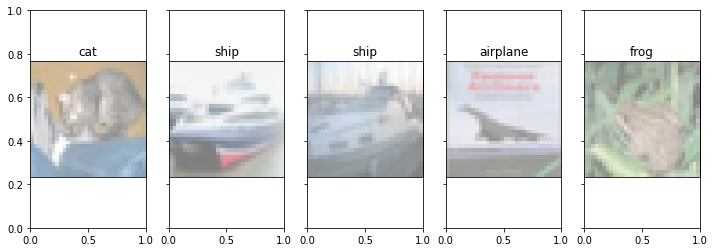

Reconstructed Images


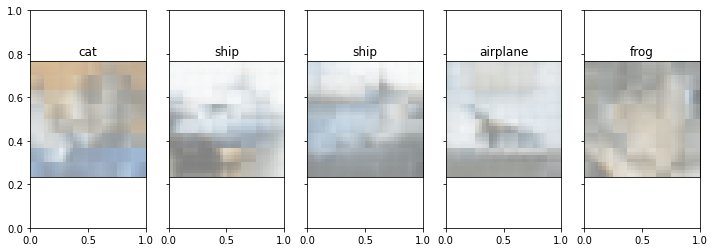

In [8]:
#Batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

#Sample outputs
output = model(images)
images = images.numpy()

batch_size = 31
output = output.view(batch_size, 3, 32, 32)
output = output.detach().numpy()

#Original Images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.show()

#Reconstructed Images
print('Reconstructed Images')
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(output[idx])

    ax.set_title(classes[labels[idx]])
plt.show() 